In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = pd.read_csv('listings.csv')

In [61]:
df.head()

,id,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,117122.0,City Centre-Waterside Retreat,My Harbourside apartment centrally located min...,Marcus,5/15/2011,My Harbourside apartment centrally located min...,within an hour,100%,95%,Unknown,...,4.99,4.98,4.97,4.88,f,1,0,1,0,1.20
2,176306.0,The White Room - Central Bristol Art House Ga...,"A small double room in an artist's house, with...",Orla,6/16/2011,"A small double room in an artist's house, with...",within a few hours,100%,58%,t,...,4.96,4.94,4.77,4.73,f,1,0,1,0,0.39
3,307634.0,"'The Sunset Room' Peaceful, Clear Home","Close to Bristol and Bath Railway Path, leadin...",Wendy,1/8/2012,"Close to Bristol and Bath Railway Path, leadin...",within an hour,100%,96%,t,...,4.92,4.82,4.84,4.71,f,3,0,3,0,0.48
5,391093.0,Characterful home in great location,"Cosy, victorian, terraced home in a quiet side...",Louise,3/18/2012,"Cosy, victorian, terraced home in a quiet side...",within a few hours,100%,79%,t,...,4.83,4.88,4.64,4.65,f,1,0,1,0,0.67
6,399681.0,Historic Trym House - five star!,We actually have up to 4 rooms available with ...,Kevin & Lesley,3/17/2012,We actually have up to 4 rooms available with ...,within an hour,100%,72%,t,...,4.98,4.99,4.97,4.90,f,1,0,1,0,0.73


**DATA CLEANING PROCESS**

In [72]:
missing_values_dict=df.isnull().sum().to_dict()
for column, missing in missing_values_dict.items():
    print(f'{column}:{missing}')

listing_ID:0
listing_name:0
description:0
host_name:0
host_since:0
host_response_time:0
host_response_rate:0
host_acceptance_rate:0
host_is_superhost:0
host_verifications:0
host_has_profile_pic:0
host_identity_verified:0
neighborhood:0
latitude:0
longitude:0
property_type:0
room_type:0
accommodates:0
bathrooms:0
bathrooms_text:1
bedrooms:0
beds:0
amenities:0
price:0
minimum_nights:0
maximum_nights:0
has_availability:0
availability_30:0
availability_365:0
number_of_reviews:0
number_of_reviews_ltm:0
number_of_reviews_l30d:0
first_review:0
last_review:0
review_scores_rating:0
review_scores_accuracy:0
review_scores_cleanliness:0
review_scores_checkin:0
review_scores_communication:0
review_scores_location:0
review_scores_value:0
instant_bookable:0
calculated_host_listings_count:0
calculated_host_listings_count_entire_homes:0
calculated_host_listings_count_private_rooms:0
calculated_host_listings_count_shared_rooms:0
reviews_per_month:0


In [19]:
df.drop(columns=['host_neighbourhood','calendar_updated','license','neighbourhood_group_cleansed','host_about','neighborhood_overview'], inplace=True)

In [71]:
df.drop(columns=['host_location'], inplace=True)

In [24]:
df.drop(columns=['neighbourhood'], inplace=True)

In [53]:
df.drop(columns=['listing_url','scrape_id','last_scraped','source'], inplace=True)

In [98]:
df.drop(columns=['host_verifications','host_has_profile_pic'], inplace=True)

In [58]:
df.drop(columns=['picture_url','host_id','host_url','host_thumbnail_url','host_picture_url','host_listings_count','calendar_last_scraped','host_total_listings_count'], inplace=True)

In [64]:
df.drop(columns=['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_60','availability_90'], inplace=True)

In [26]:
df.rename(columns={'neighbourhood_cleansed': 'neighborhood'}, inplace=True)

In [66]:
df.rename(columns={'id': 'listing_ID'}, inplace=True)
df.rename(columns={'name': 'listing_name'}, inplace=True)

In [22]:
df['description'] = df['description'].fillna('No Details Provided')

In [28]:
df['host_location'] = df['description'].fillna('Unknown')
df['host_response_time'] = df['host_response_time'].fillna('Unavailable')
df['host_response_rate'] = df['host_response_rate'].fillna('Unavailable')
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('Unavailable')
df['host_is_superhost'] = df['host_is_superhost'].fillna('Unknown')
df['has_availability'] = df['has_availability'].fillna('Unknown')

In [32]:
df.dropna(subset=['first_review'], axis=0, inplace=True)

In [35]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

In [41]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

In [43]:
mean= df['price'].mean()
df['price'] = df['price'].fillna(mean)

In [50]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

**EDA (Exploratory Data Analysis)**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 1 to 2595
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_ID                                    1880 non-null   float64       
 1   listing_name                                  1880 non-null   object        
 2   description                                   1880 non-null   object        
 3   host_name                                     1880 non-null   object        
 4   host_since                                    1880 non-null   object        
 5   host_response_time                            1880 non-null   object        
 6   host_response_rate                            1880 non-null   object        
 7   host_acceptance_rate                          0 non-null      float64       
 8   host_is_superhost                             1880 non-null   object     

In [100]:
df.describe()

,listing_ID,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.880000e+03,0.0,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,...,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,4.964043e+17,NaN,51.460509,-2.590662,3.562766,1.299468,1.635106,2.049468,132.092021,2.644681,...,4.745117,4.850872,4.852862,4.757298,4.674330,17.783511,16.289894,0.860106,0.004787,1.953335
min,1.171220e+05,NaN,51.404176,-2.700901,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.793026e+07,NaN,51.450711,-2.609500,2.000000,1.000000,1.000000,1.000000,64.000000,1.000000,...,4.647500,4.820000,4.827500,4.670000,4.560000,1.000000,1.000000,0.000000,0.000000,0.590000
50%,6.190000e+17,NaN,51.460775,-2.593100,3.000000,1.000000,1.000000,1.000000,99.000000,2.000000,...,4.850000,4.930000,4.950000,4.830000,4.770000,2.000000,1.000000,0.000000,0.000000,1.270000
75%,9.432500e+17,NaN,51.469500,-2.577839,4.000000,1.500000,2.000000,3.000000,142.000000,2.000000,...,4.970000,5.000000,5.000000,4.950000,4.900000,6.000000,6.000000,1.000000,0.000000,2.752500
max,1.180000e+18,NaN,51.513480,-2.512990,16.000000,15.000000,13.000000,21.000000,9999.000000,365.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,157.000000,145.000000,6.000000,3.000000,14.420000
std,4.650236e+17,NaN,0.017530,0.027141,2.342948,0.676685,1.113009,1.802133,342.777089,9.815831,...,0.329864,0.269758,0.279765,0.297627,0.361131,41.303926,38.469060,1.424750,0.119777,1.969906


In [ ]:
#We can see that the minimum price of properties available are $20 whereas the maximum price of the properties are $9999

In [84]:
columns_of_interest = ['price','number_of_reviews_ltm', 'availability_365',
    'accommodates', 'neighborhood', 'property_type',
    'room_type', 'calculated_host_listings_count', 'minimum_nights', 'maximum_nights',
    'bathrooms', 'bedrooms', 'beds', 'amenities']
stats = {}
for col in columns_of_interest:
    if df[col].dtype in ['int64', 'float64']:  
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0] if not df[col].mode().empty else None  
    else:  
        mean = 'N/A'
        median = 'N/A'
        mode = df[col].mode()[0] if not df[col].mode().empty else None
    
    stats[col] = {'Mean': mean, 'Median': median, 'Mode': mode}

stats_df = pd.DataFrame(stats).T
print(stats_df)

                                      Mean Median  \
price                           132.092021   99.0   
number_of_reviews_ltm            17.143085    9.0   
availability_365                179.555319  175.0   
accommodates                      3.562766    3.0   
neighborhood                           N/A    N/A   
property_type                          N/A    N/A   
room_type                              N/A    N/A   
calculated_host_listings_count   17.783511    2.0   
minimum_nights                    2.644681    2.0   
maximum_nights                  464.619149  365.0   
bathrooms                         1.299468    1.0   
bedrooms                          1.635106    1.0   
beds                              2.049468    1.0   
amenities                              N/A    N/A   

                                                                             Mode  
price                                                                       100.0  
number_of_reviews_ltm               

In [86]:
#Therefore we understand that the average price of all properties is $132, the median tells us that anything below $99 is a lower price 
#whereas anything above it is a higher price
#the total average number of reviews is 61, properties are available approximately 180 days a year, 
#the average number of people that can be accomadated is 3, and most of the properties accomodate 2 people
#the most popular neighborhood is Ashley and the most popular property type is an entire rental unit. Entire homes/apts are the most popular room type.
#the avg minimum number of nights required for booking is approximately 3, where avg maximum nights for booking are 465
#the avg number of beds in all properties is 2 whereas bedrooms and bathrooms are 1

In [171]:
df.columns

Index(['listing_ID', 'listing_name', 'description', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculate

In [76]:
df['neighborhood'].unique()

array(['Hotwells & Harbourside', 'Southville', 'Easton', 'Redland',
       'Westbury-on-Trym & Henleaze', 'Ashley', 'Lawrence Hill',
       'Clifton', 'Knowle', 'Stoke Bishop', 'Henbury & Brentry',
       'Eastville', 'Southmead', 'Clifton Down', 'Cotham',
       'Windmill Hill', 'Avonmouth & Lawrence Weston',
       'Bishopston & Ashley Down', 'Brislington East', 'Bedminster',
       'Central', 'Brislington West', 'St George West', 'Lockleaze',
       'Horfield', 'St George Troopers Hill', 'Stockwood', 'Hillfields',
       'Frome Vale', 'Hengrove & Whitchurch Park', 'St George Central',
       'Hartcliffe & Withywood', 'Filwood', 'Bishopsworth'], dtype=object)

In [77]:
df['neighborhood'].value_counts()

neighborhood
Ashley                         223
Central                        189
Clifton Down                   143
Clifton                        133
Southville                     111
Lawrence Hill                   90
Cotham                          90
Hotwells & Harbourside          73
Windmill Hill                   72
Easton                          71
Redland                         62
Eastville                       58
Bishopston & Ashley Down        50
Frome Vale                      43
Avonmouth & Lawrence Weston     41
Bedminster                      39
Brislington West                39
Horfield                        35
Westbury-on-Trym & Henleaze     33
St George West                  29
Knowle                          28
Stoke Bishop                    26
St George Central               26
Bishopsworth                    24
Lockleaze                       21
Southmead                       20
Brislington East                17
Filwood                         17
Hengrov

In [87]:
#The most popular neighborhood for bookings is Ashley whereas the least popular neighborhood is Hartcliffe & Withywood.

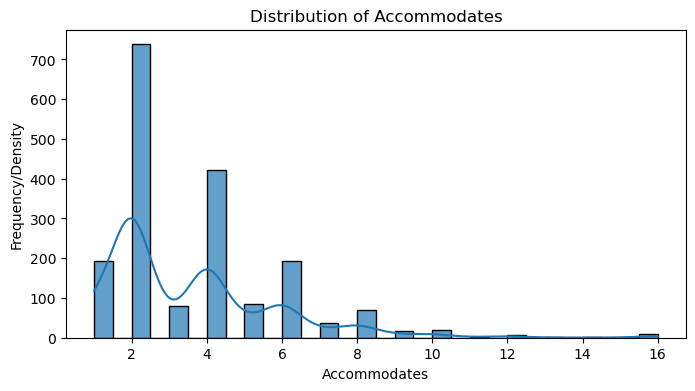

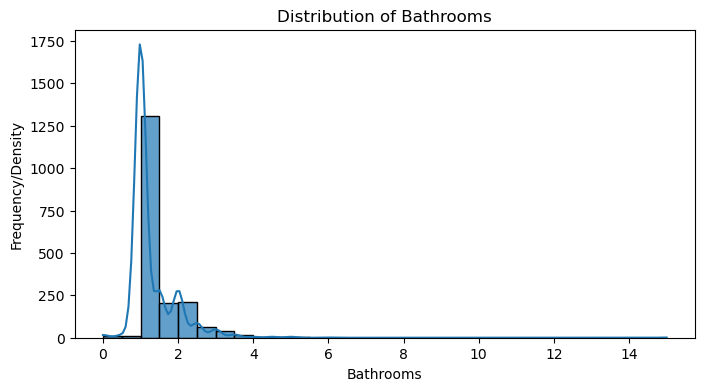

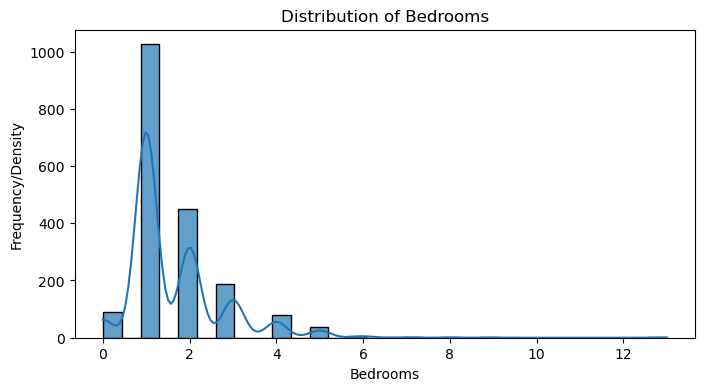

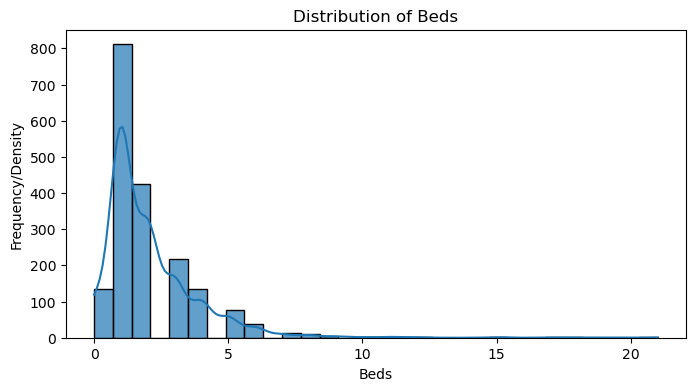

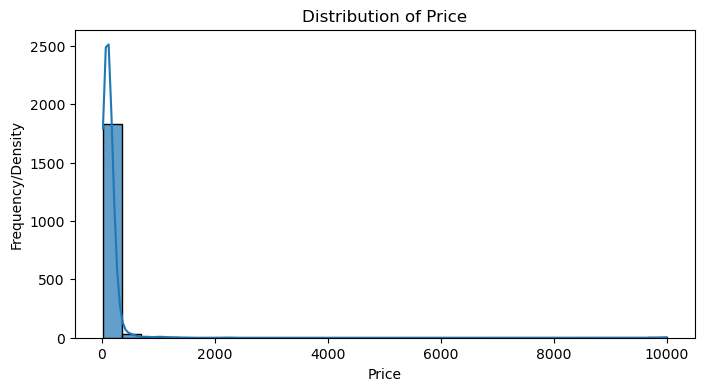

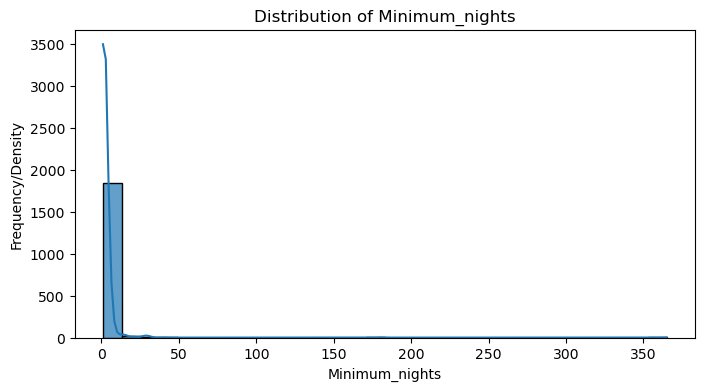

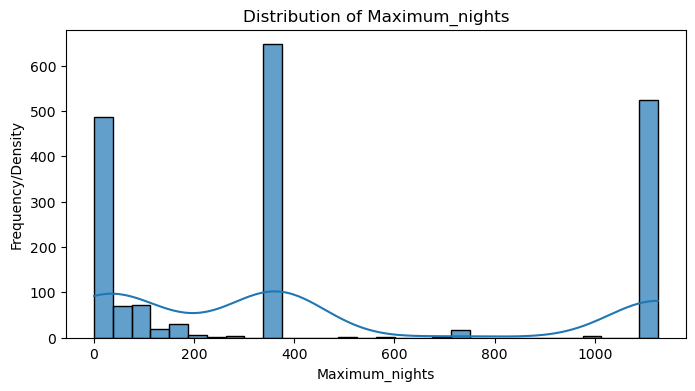

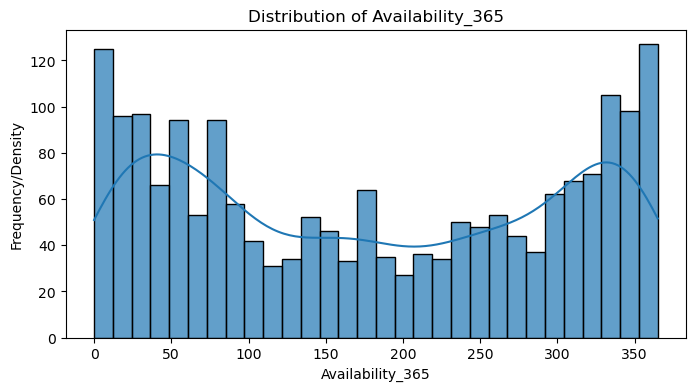

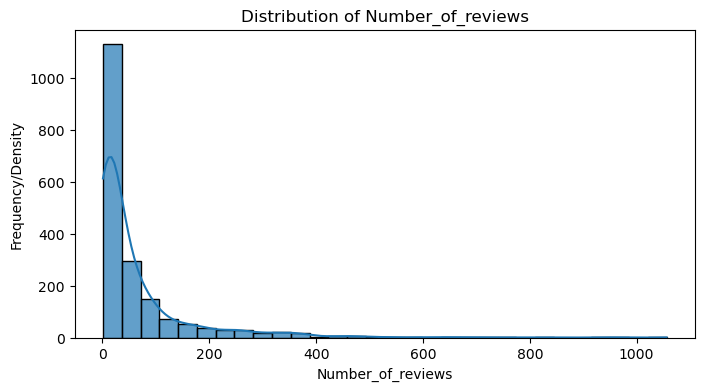

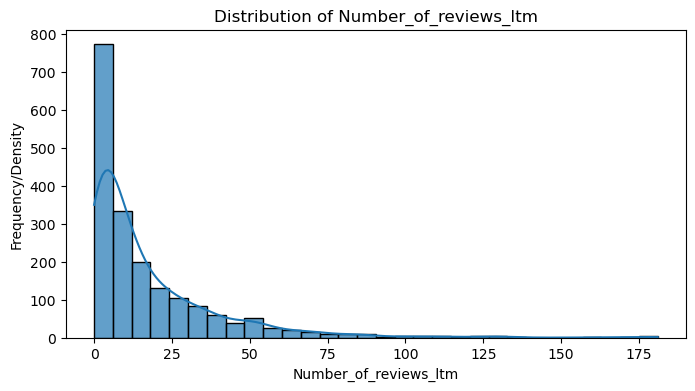

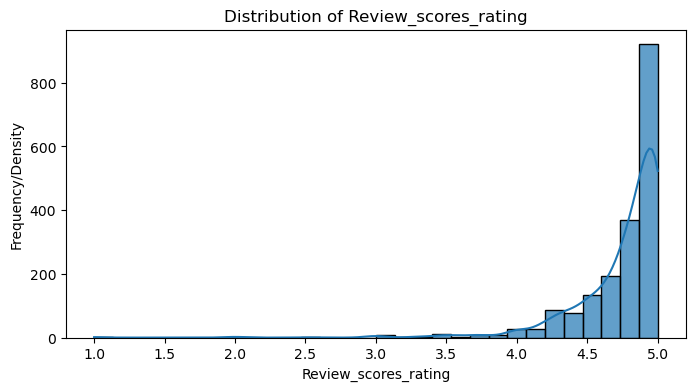

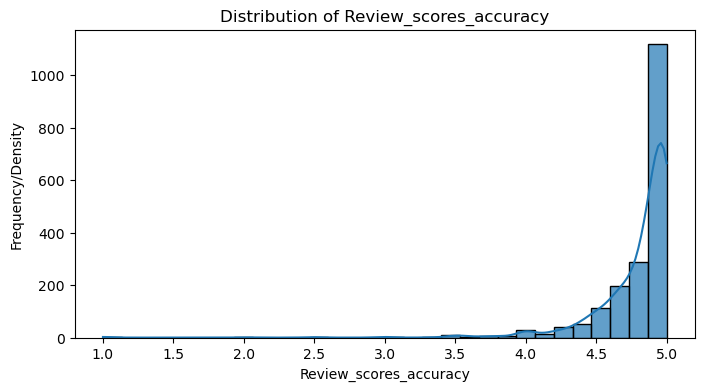

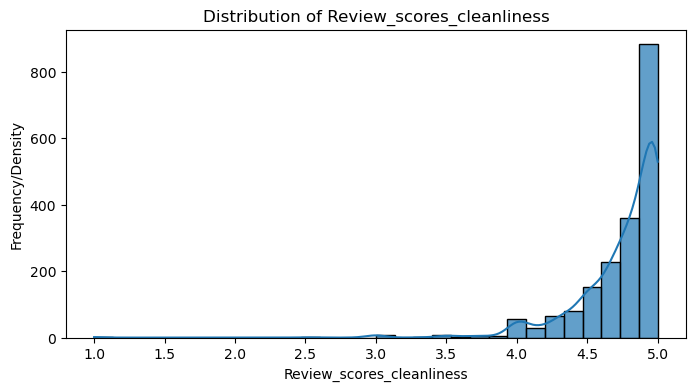

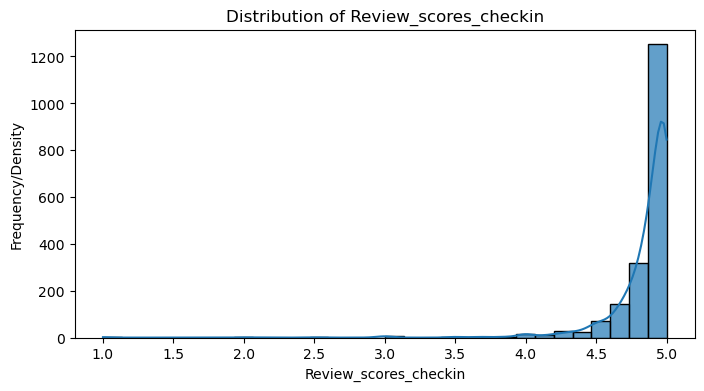

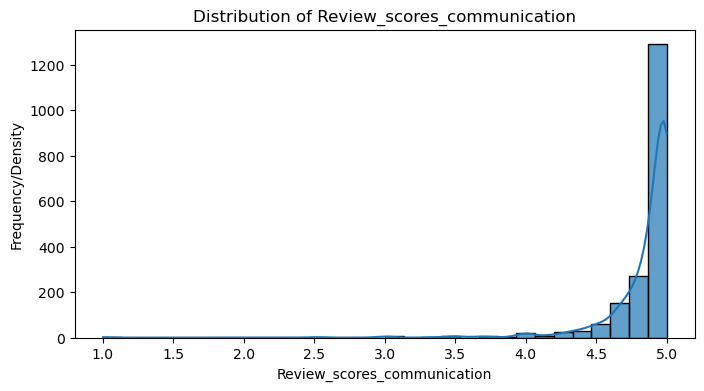

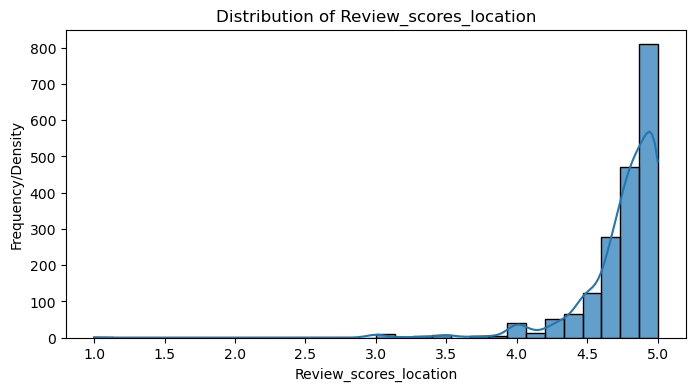

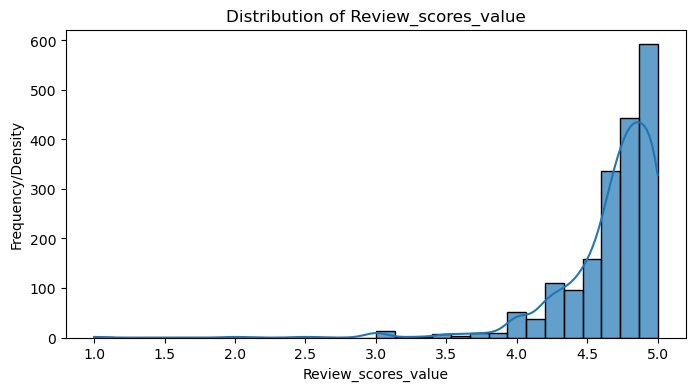

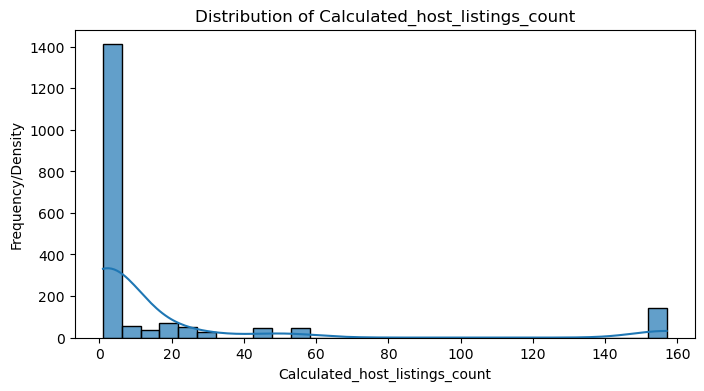

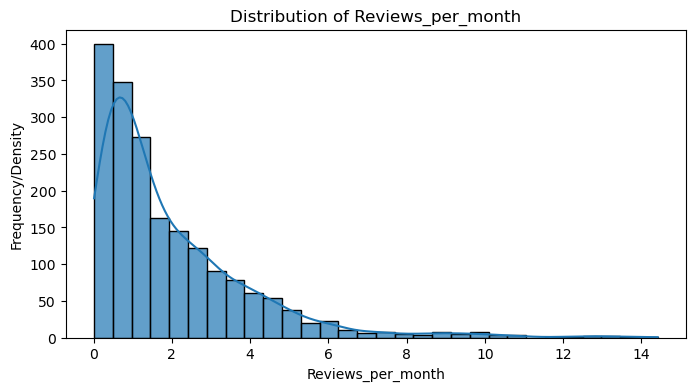

In [196]:
columns_to_plot = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 
                   'maximum_nights', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month'] 

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency/Density')
    plt.show()

In [102]:
#From the above histogram combined KDE plots, we can observe that most properties can accomodate 2 people, 
#whereas in about 400 listings, 4 people can be accomodated
#More than 1200 listings have 1 bathroom whereas 200 listings have 2-3 bathrooms
#1000 listings have 1 bedroom whereas a little over 400 listings have 2 bedrooms
#Around 800 listings have 1-2 beds
#Review score ratings for all factors are mostly 5 star ratings

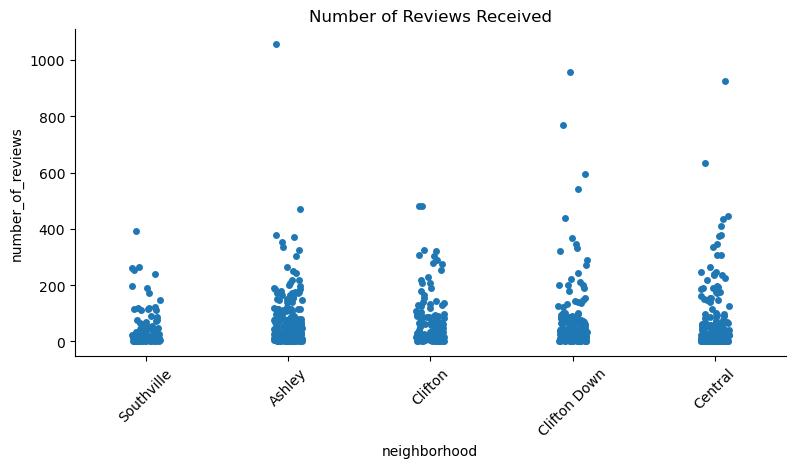

In [126]:
top_neighborhoods= ['Ashley', 'Central', 'Clifton Down', 'Clifton', 'Southville']
filtered_df = df[df['neighborhood'].isin(top_neighborhoods)]
sns.catplot(x='neighborhood',y='number_of_reviews',data=filtered_df, height=4, aspect=2)
plt.title('Number of Reviews Received')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#The above cat plot shows that Ashley and Central have the greatest number of reviews followed by Clifton Down

C:\Users\alish\AppData\Local\Temp\ipykernel_6636\3890997529.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighborhood', data=df, palette='plasma')


Text(0.5, 1.0, 'Number of Properties Available')

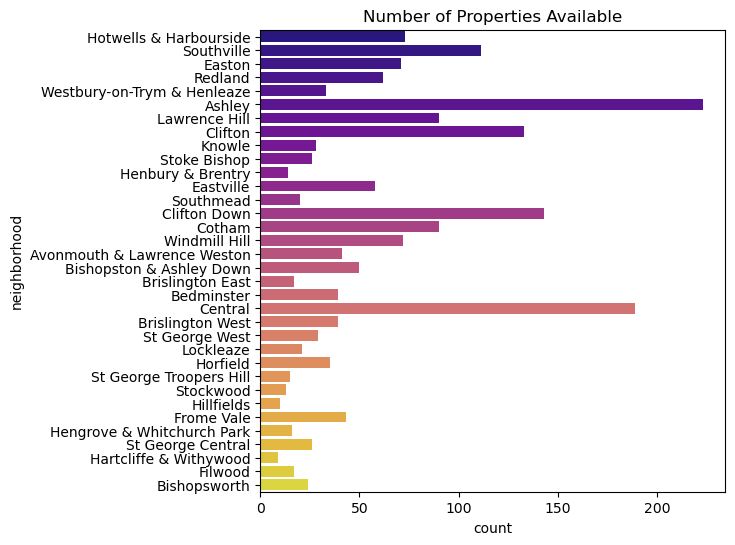

In [127]:
sns.countplot(y='neighborhood', data=df, palette='plasma')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Number of Properties Available')

In [128]:
#Ashley neighborhood has the greatest number of properties available whereas Hartcliffe & Whithywood has the lowest.

C:\Users\alish\AppData\Local\Temp\ipykernel_6636\426276182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='plasma')


Text(0.5, 1.0, 'Room Types')

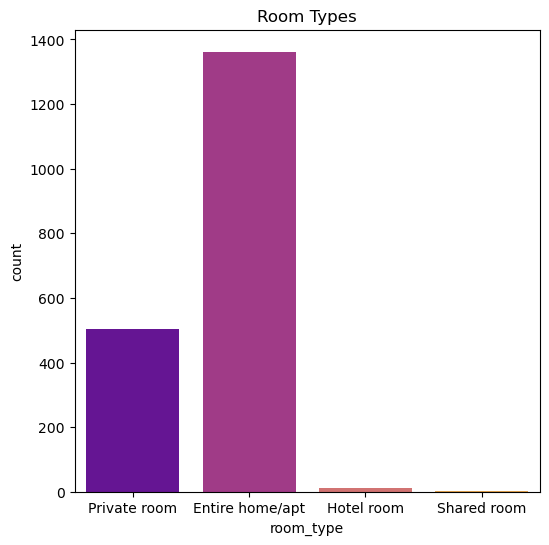

In [130]:
sns.countplot(x='room_type', data=df, palette='plasma')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Room Types')

In [131]:
#The least number of room types available in bristol are shared rooms

<Axes: xlabel='room_type', ylabel='count'>

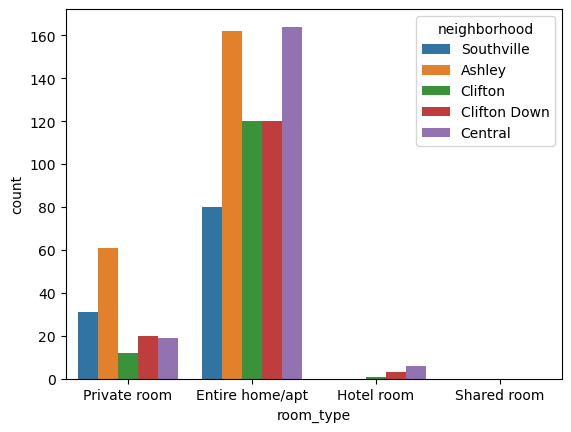

In [133]:
sns.countplot(x=df['room_type'], hue='neighborhood', data=filtered_df)

In [135]:
#In the top 5 neighborhoods, we see that Ashley has the most listings for entire homes/apts and private rooms.
#Central has the most listings for hotel rooms and second most listings for entire homes/apts.

C:\Users\alish\AppData\Local\Temp\ipykernel_6636\2022412887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=filtered_df,x='neighborhood',y='availability_365',palette='plasma')


Text(0.5, 1.0, 'Availability of Properties in All Neighborhoods')

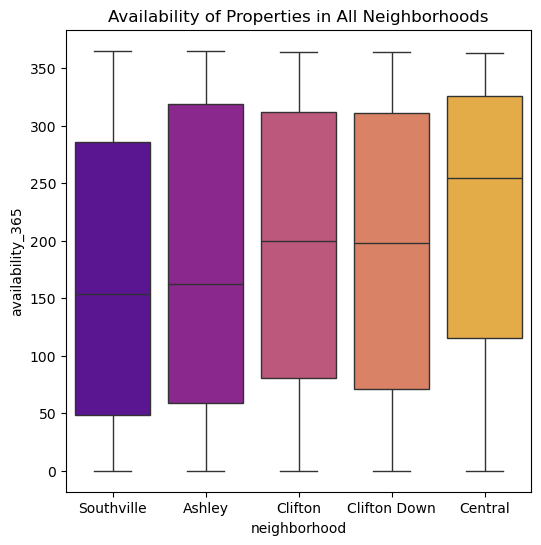

In [141]:
plt.figure(figsize=(6,6))
ax=sns.boxplot(data=filtered_df,x='neighborhood',y='availability_365',palette='plasma')
plt.title('Availability of Properties in All Neighborhoods')

In [ ]:
#From the above boxplot we can see that 50% of listings have between 50 and 280 available nights over the next 365 days in southville. 
#In Ashley neighborhood, 50% of listings have between 60 and 320 available nights over the next 365 days.
#The median line in Ashley is closer to Q1 which means that the distribution is right-skewed thus more listings have lower availability.
#In Central the median line is closer to Q3 which means that the distribution is left-skewed thus more listings have higher availability.

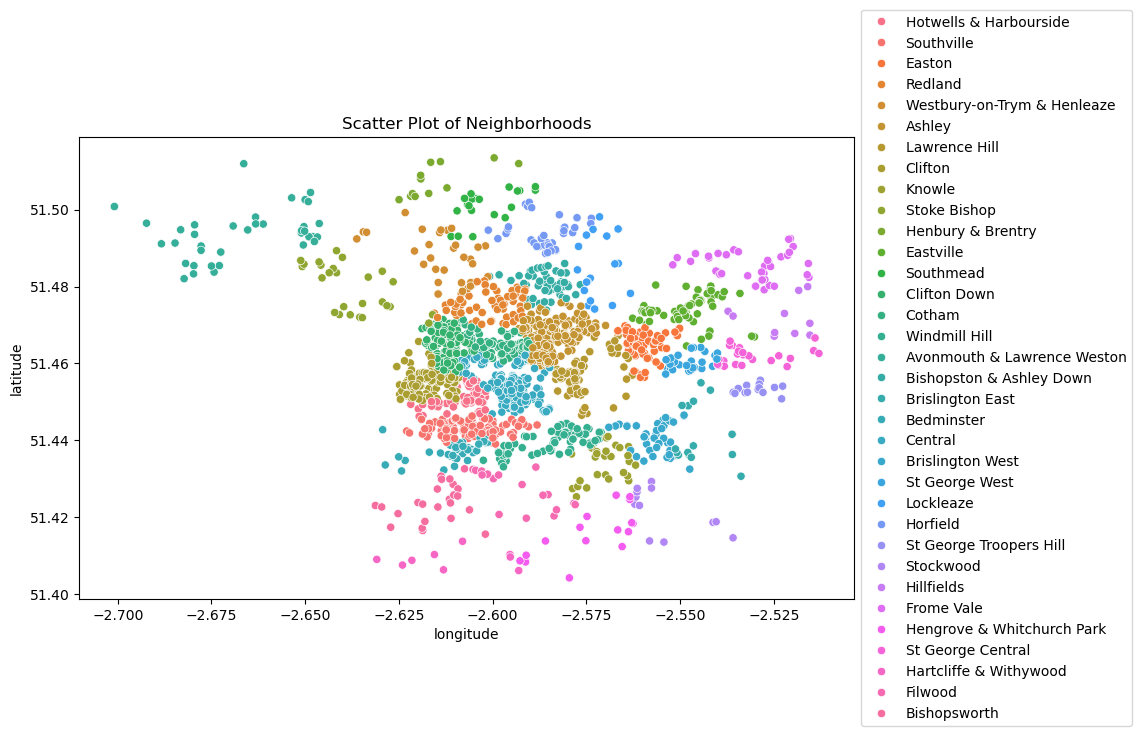

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
df.neighborhood=df['neighborhood']
scatter_plot=sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighborhood)
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Scatter Plot of Neighborhoods')
plt.show()

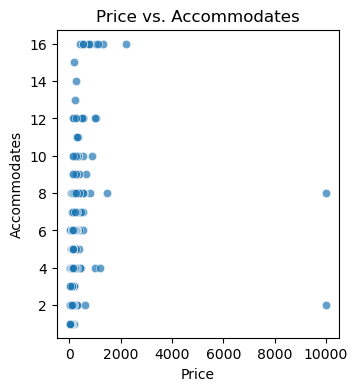

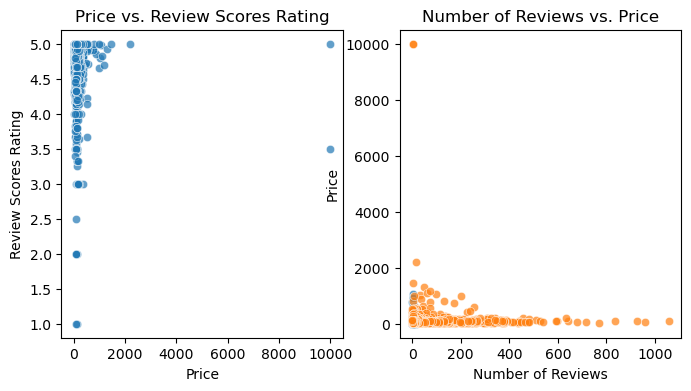

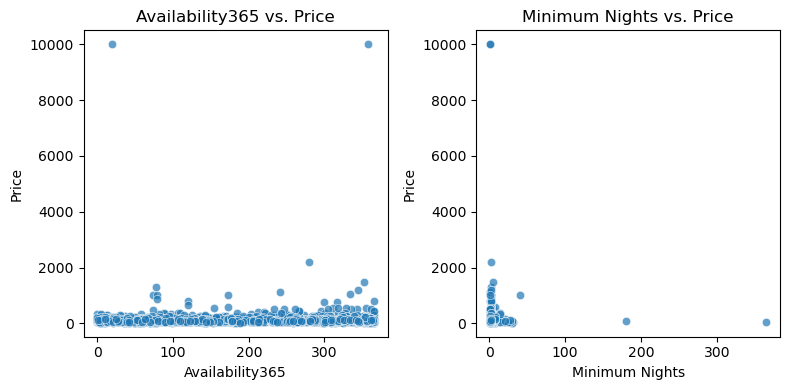

In [203]:
# Scatter plot: Price vs. Accommodates
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='price', y='accommodates', alpha=0.7)
plt.title('Price vs. Accommodates')
plt.xlabel('Price')
plt.ylabel('Accommodates')

# Scatter plot: Price vs. Review Scores Rating
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='price', y='review_scores_rating', alpha=0.7)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')

# Scatter plot: Accomodates vs. Number of Reviews
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='accommodates', y='number_of_reviews', alpha=0.7)
plt.title('Accomodates vs. Number of Reviews')
plt.xlabel('Accomodates')
plt.ylabel('Number of Reviews')

# Scatter plot: Number of Reviews vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.7)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')

# Scatter plot: Availability365 vs. Price
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.7)
plt.title('Availability365 vs. Price')
plt.xlabel('Availability365')
plt.ylabel('Price')

# Scatter plot: Minimum Nights vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.7)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
#availability_365 vs. price shows that some of the listings available for the next 356 days are priced differently although the dominant trend is 
#that prices remain the same.
#price vs review scores ratings shows that listings with higher ratings show a trend towards higher pricing.

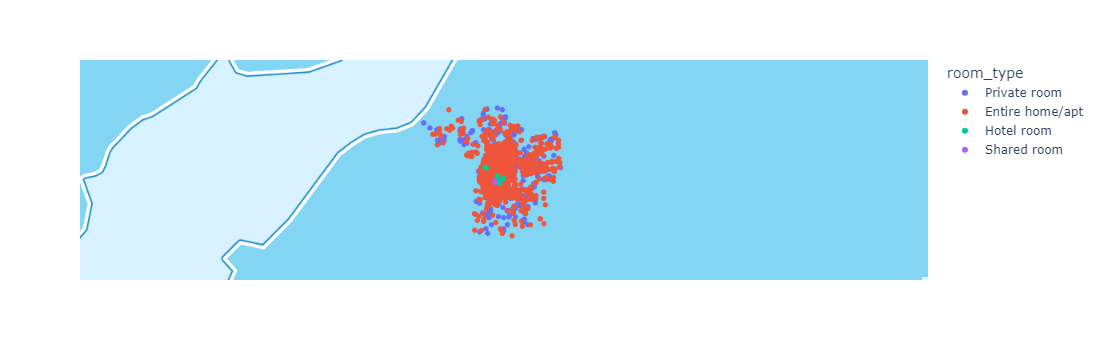

In [166]:
import plotly
import plotly.express as px
fig = px.scatter_mapbox(df,
                       lat='latitude',
                       lon='longitude',
                       color='room_type',
                       size_max=200,
                       zoom=9,
                       mapbox_style='https://demotiles.maplibre.org/style.json')
fig.show()

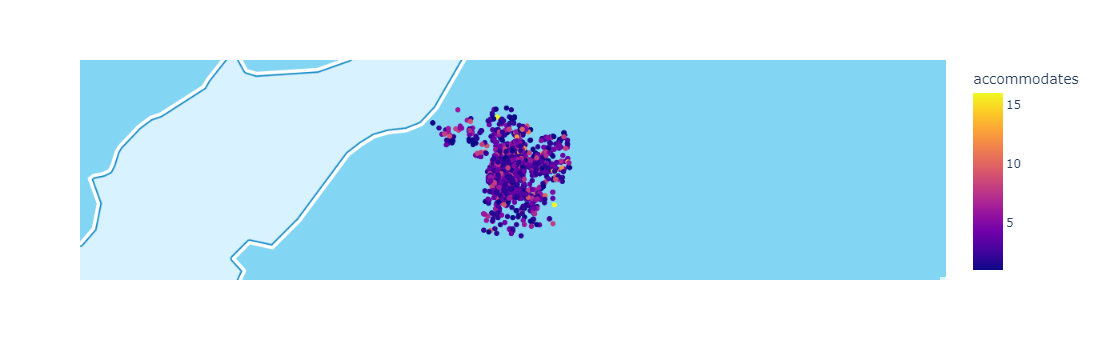

In [167]:
import plotly
import numpy as np
import plotly.express as px
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color='accommodates',zoom=9,
                       mapbox_style='https://demotiles.maplibre.org/style.json')
fig.show()

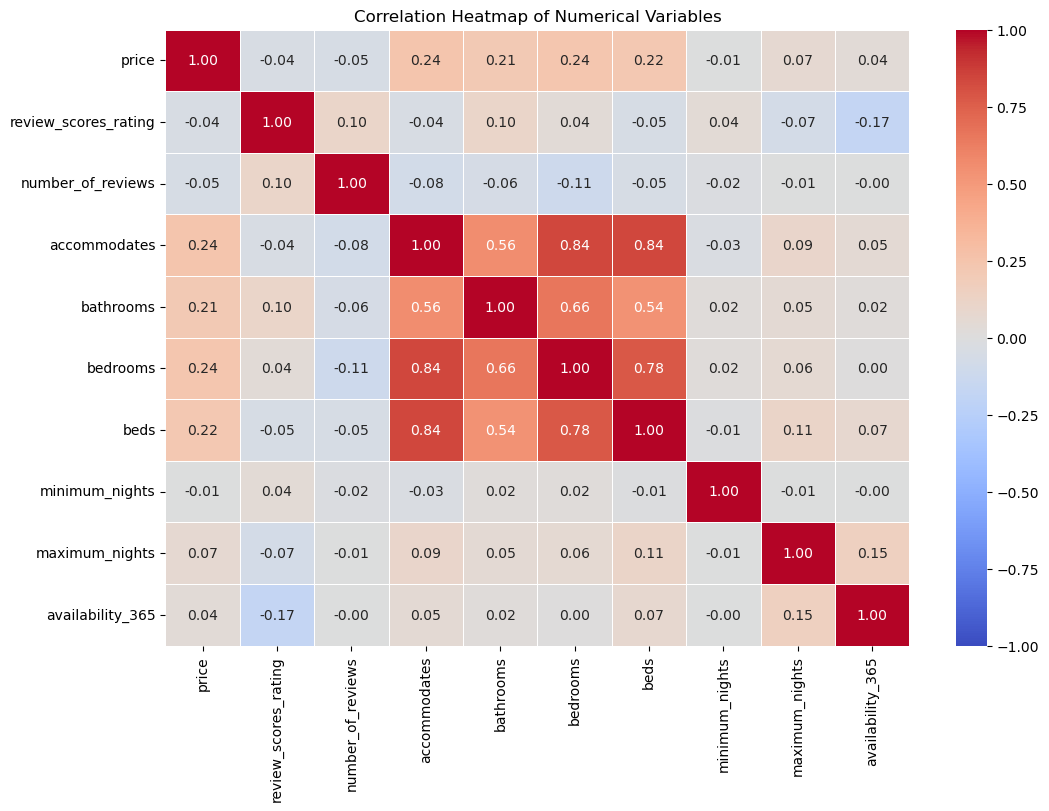

In [214]:
columns_to_plot2 = ['price', 'review_scores_rating', 'number_of_reviews', 
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                   'minimum_nights', 'maximum_nights', 'availability_365']
df_numerical = df[columns_to_plot2]
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,vmax=1,vmin=-1,fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [215]:
#Darker colors represent stronger positive correlations, while lighter colors represent stronger negative correlations.
#A coefficient close to 1 or -1 indicates a strong relationship, while a coefficient close to 0 indicates a weak relationship.
#We can see that price and the number of people that can be accomdated have a weak to moderate relationship so there might be
#a tendency for price to increase with number of accomdations.

In [172]:
top_10_hosts=df['host_name'].value_counts()[:10]
top_10_hosts

host_name
Hopewell               141
Your Apartment          71
Mairead June            46
Sarah                   25
Louise                  23
Luke                    23
Prescott Apartments     20
Neil                    19
Emma                    17
Michael                 17
Name: count, dtype: int64

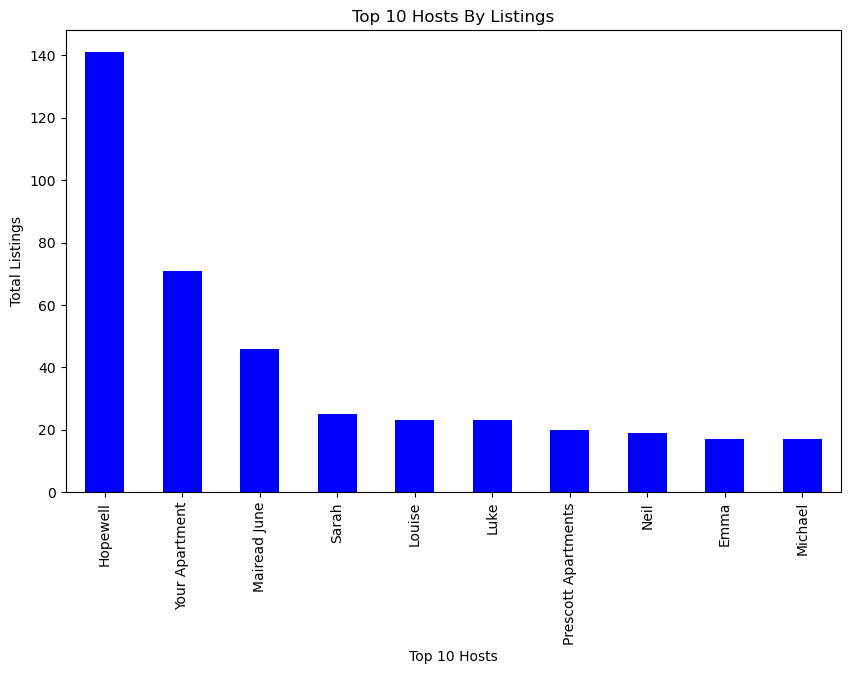

In [195]:
top_10_hosts.plot(kind='bar',color='b',figsize=(10,6))
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total Listings')
plt.title('Top 10 Hosts By Listings')
plt.show()

C:\Users\alish\AppData\Local\Temp\ipykernel_6636\3756859209.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




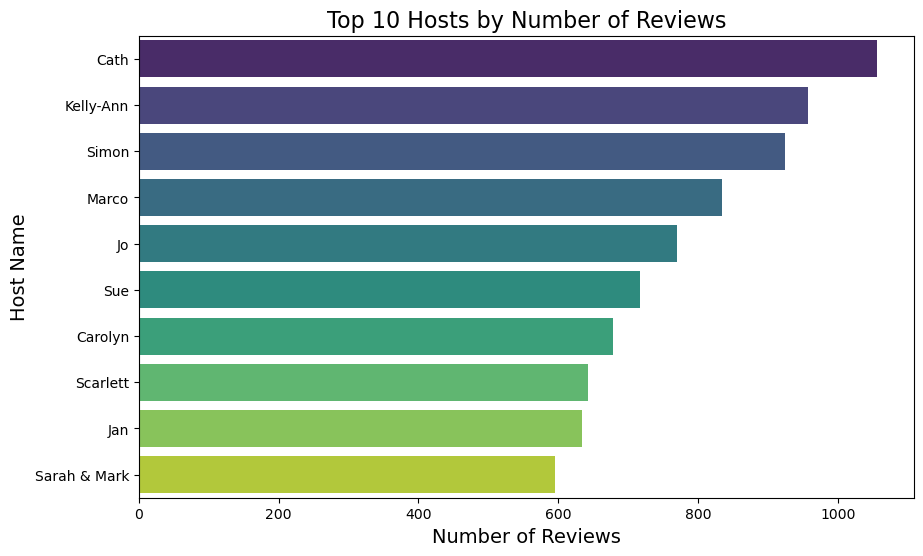

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_reviews', y='host_name', data=popular_hosts, palette='viridis')
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Host Name', fontsize=14)
plt.title('Top 10 Hosts by Number of Reviews', fontsize=16)
plt.show()

In [194]:
most_popular_listings = df.loc[df.groupby('neighborhood')['number_of_reviews'].idxmax()]
most_popular_listings = most_popular_listings[['listing_name', 'host_name','neighborhood', 'number_of_reviews', 'room_type','price']]
most_popular_listings = most_popular_listings.sort_values(by='number_of_reviews', ascending=False).reset_index(drop=True)
most_popular_listings

,listing_name,host_name,neighborhood,number_of_reviews,room_type,price
0,Comfortable and Clean Flat - Great Location,Cath,Ashley,1056,Entire home/apt,89.0
1,The Garden Room in Redland with parking,Kelly-Ann,Clifton Down,957,Entire home/apt,78.0
2,CENTRAL - FREE PARKING - STYLISH APT,Simon,Central,924,Entire home/apt,104.0
3,Stunning traditional flat in the heart of Bristol,Marco,Cotham,834,Entire home/apt,83.0
4,"x Just off Gloucester Rd, small modern studio",Carolyn,Redland,678,Entire home/apt,59.0
5,1 bed apartment - Central Bristol,Scarlett,Lawrence Hill,642,Entire home/apt,111.0
6,Lovely Victorian 3 bed terraced house,Catherine,Filwood,526,Entire home/apt,100.0
7,"Clifton Village, superfast internet, car permit",Joanna,Clifton,483,Entire home/apt,157.0
8,"Double loft room, Bristol",Sheila,Westbury-on-Trym & Henleaze,477,Private room,60.0
9,Bristol studio+kitchen+parking+private access,Jaya,Knowle,473,Entire home/apt,75.0


In [204]:
#From the above we can see the name of the most popular listing by number of reviews, it's neighborhood, price and room type.
#Host Cath has 1056 reviews for an entire home/apt retailing at $89

In [216]:
df.to_csv('cleaned_data.csv', index=False)